# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Ega Kurnia Akbar Siregar
- Email: ega.srg@gmail.com
- Id Dicoding: r_ega_r

## I. Persiapan

### 1.1. Menentukan Pertanyaan Bisnis

1.   Apa saja kategori produk dengan volume penjualan tertinggi dan terendah?
2.   Bagaimana performa penjualan penjualan setiap bulan?
3.   Di mana wilayah yang memiliki persebaran konsumen paling banyak?
4.   Bagaimana Performa Penjualan berdasarkan analisis RFM?





### 1.2. Menyiapkan semua library yang dibuthkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import matplotlib.image as mpimg
from scipy import stats


## II. Data Wrangling

### 2.1. Gathering Data

Mounting Google Drive Data

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


Data fetched from google drive and transformed into Dataframe

In [ ]:
# Directory containing the CSV files
data_dir = "/gdrive/MyDrive/ecommerce/"

# Opening Datasets
orders_df = pd.read_csv(data_dir + 'orders_dataset.csv')
items_df = pd.read_csv(data_dir + 'order_items_dataset.csv')
products_df = pd.read_csv(data_dir + 'products_dataset.csv')
payments_df = pd.read_csv(data_dir + 'order_payments_dataset.csv')
reviews_df = pd.read_csv(data_dir + 'order_reviews_dataset.csv')
customers_df = pd.read_csv(data_dir + 'customers_dataset.csv')
sellers_df = pd.read_csv(data_dir + 'sellers_dataset.csv')
geolocation_df = pd.read_csv(data_dir + 'geolocation_dataset.csv')
category_df = pd.read_csv(data_dir + 'product_category_name_translation.csv')

dataframes= [orders_df, items_df, products_df, payments_df,reviews_df,customers_df,sellers_df,geolocation_df,category_df]
dataframes_name= ["Orders", "Items", "Products", "Payments","Reviews","Customers","Sellers", "Geolocation", "Category"]

Check info on every dataset

### 2.2. Wrangling Process

####2.2.1 Check Info

In [ ]:
items_df.sample(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
99835,e26598114d061f9c0f384b028f666c53,1,e59dd207c69d86e890febadc796d1078,e9bc59e7b60fc3063eb2290deda4cced,2018-05-11 15:54:37,148.00,9.91
91770,d03665e5fcb519e311e5609b2d0d2282,1,13b84ccbd3ce6a81ff8333896dbe84d8,53e4c6e0f4312d4d2107a8c9cddf45cd,2017-12-21 22:32:06,42.00,28.75
61913,8d5169ccfdb4902626694da89865ebd0,1,64fb265487de2238627ce43fe8a67efc,4a3ca9315b744ce9f8e9374361493884,2018-05-07 02:51:50,88.00,12.27
20252,2e7080c8c24e4a977925ca08b6a7d917,1,3bdc89e963c6651b8af38ede485cc82b,fffd5413c0700ac820c7069d66d98c89,2018-01-01 22:30:19,262.50,115.49
19402,2c8d9784e391f6ad2c09094366d48226,1,89321f94e35fc6d7903d36f74e351d40,16090f2ca825584b5a147ab24aa30c86,2018-05-27 21:55:40,27.90,12.94
83073,bcaa7f7240deb32b0410ee6cc085d9b4,1,dd4bb630f241ce3910d9595b395efeb5,6061155addc1e54b4cfb51c1c2a32ad8,2018-08-15 10:30:19,128.00,8.16
38635,57c81c283a192e74b48c36108ad73101,1,5ab535a49436f1b34f5b83ca7375c4ef,d66c11a9572221d92fbb8c4897db5f9b,2018-07-18 18:43:53,27.97,18.00
12363,1c0b35b038ee803f39a777029e93e417,1,e03102efbc2229024c89be731f0aedcb,2c9e548be18521d1c43cde1c582c6de8,2018-01-18 13:52:29,39.90,9.34
81778,b9e2b866cb381ea49beee36e3baaa76e,1,72ca7a219f9f5b1be88c79e3aedd0152,de23c3b98a88888289c6f5cc1209054a,2017-12-21 19:31:42,120.00,9.66
69191,9e0129e16582f12822d2b9bd92c8d6d9,1,154e7e31ebfa092203795c972e5804a6,cc419e0650a3c5ba77189a1882b7556a,2017-03-21 14:26:01,19.99,10.96


In [ ]:
for i in range(len(dataframes)):
  test = dataframes[i]
  print("Table Name:",dataframes_name[i])
  test.info()
  print ("\n")

Table Name: Orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Table Name: Items
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_

After checkhing the info, there are some incorrect data type in following dataframes:
1. Order : order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date  , & order_estimated_delivery_date (Data type is Object instead of Datetime)
2. Items : shipping_limit_date (Data type is Object instead of Datetime)
3. Reviews : review_creation_date & review_answer_timestamp (Data type is Object instead of Datetime)

####2.2.2. Check Duplicates on every dataset

In [ ]:
for i in range(len(dataframes)):
  test = dataframes[i]
  print("Table Name:",dataframes_name[i])
  print ("Duplicates:", test.duplicated().sum())

Table Name: Orders
Duplicates: 0
Table Name: Items
Duplicates: 0
Table Name: Products
Duplicates: 0
Table Name: Payments
Duplicates: 0
Table Name: Reviews
Duplicates: 0
Table Name: Customers
Duplicates: 0
Table Name: Sellers
Duplicates: 0
Table Name: Geolocation
Duplicates: 261831
Table Name: Category
Duplicates: 0


Issues : There are duplicates detected in Geolocation Table.

#### 2.2.3. Describe every dataset
Note: Ignoring "Products","Customers","Sellers","Geolocation"


In [ ]:
pass_test = ["Products","Customers","Sellers","Geolocation"]
for i in range(len(dataframes)):
  test = dataframes[i]
  if dataframes_name[i] in pass_test:
    continue
  print("Table Name:",dataframes_name[i])
  print ("Descriptive Stats:\n", test.describe(),"\n")


Table Name: Orders
Descriptive Stats:
                                 order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2

All seems normal

#### 2.2.4. Check Missing value on every dataset

In [ ]:
for i in range(len(dataframes)):
  test = dataframes[i]
  print("Table Name:",dataframes_name[i])
  print ("Missing Values:\n", test.isna().sum(),"\n")

Table Name: Orders
Missing Values:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

Table Name: Items
Missing Values:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

Table Name: Products
Missing Values:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 

Table Name: Payments
Missing Values:
 order_id               

There are some missing values:
1. Orders:
order_approved_at                 160,
order_delivered_carrier_date     1783,
order_delivered_customer_date    2965,
2. Products:
product_category_name         610,
product_name_lenght           610,
product_description_lenght    610,
product_photos_qty            610,
product_weight_g                2,
product_length_cm               2,
product_height_cm               2,
product_width_cm                2,
3. Reviews:
review_comment_title       87656,
review_comment_message     58247,


### 2.3. **Cleaning Data**
orders_df will be the pivot dataset for this project because we will analyze on order activity. The cleaning will be focused on orders_df.


#### 2.3.1. Dropping duplicates in Geolocation

In [ ]:
geolocation_df.drop_duplicates(inplace=True)
print ('Duplicates:',geolocation_df.duplicated().sum())

Duplicates: 0


#### 2.3.2. Cleaning Orders Data (Missing Values)

In [ ]:
#I have suspicions regarding missing values in 'order_delivered_customer_date'and 'order_delivered_carrier_date
# It seems that most of the NaN values are occured because the 'order_status 'hasn't been delivered, shipped, or approved
#Let's check
orders_df.order_status[orders_df.order_status!='delivered'].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of shipped        1107
canceled        625
unavailable     609
invoiced        314
processing      301
created           5
approved          2
Name: order_status, dtype: int64>

After inspecting non-delivered items, I decided to remove other status because they're incomplete and make many Missing Values
In the next process, I choose only the delivered items and just drop the others

In [ ]:
#check detailed order_status value in orders_df
print(orders_df.order_status.value_counts(),"\n")

#This project will take every delivered item to be calculated in the next process

orders_coloumn_deletelist = ["shipped","canceled","unavailable","invoiced","processing","created","approved"]
loop_df = orders_df

for i in range(len(orders_coloumn_deletelist)) :
  loop_df=loop_df.drop(loop_df[loop_df['order_status']==orders_coloumn_deletelist[i]].index)
orders_df = loop_df

print("After Deleting non-delivered items\n")
print (orders_df.order_status.value_counts(),"\n")
print("After that, lets see how many actual null items in delivered items on orders_df:\n")
orders_df.isna().sum()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64 

After Deleting non-delivered items

delivered    96478
Name: order_status, dtype: int64 

After that, lets see how many actual null items in delivered items on orders_df:



order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [ ]:
#Just Drop Nan Items
orders_df.dropna(subset='order_delivered_customer_date',inplace=True)
#Order_approved is not necessarily needed,
#however i just input'order_approved_at' with the exact same time as 'order_purchase_timestamp'
orders_df.order_approved_at.fillna(orders_df.order_purchase_timestamp, inplace = True)
#drop others
orders_df.dropna(inplace = True)
#Final Check
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### 2.3.3. Cleaning Reviews (Missing Values)

In [ ]:
#Rather than dropping, I just change The NaN values with "No title" and "Prefer not to comment"
reviews_df.review_comment_title.fillna("(No Title)", inplace= True)
reviews_df.review_comment_message.fillna("(Prefer not to comment)", inplace= True)
reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### 2.3.4. Changing Data Type in Orders, Items, and Reviews

In [ ]:
coloumn_list = ["order_purchase_timestamp",
                "order_approved_at",
                "order_delivered_carrier_date",
                "order_delivered_customer_date" ,
                "order_estimated_delivery_date"]
for coloumn in coloumn_list:
  orders_df[coloumn] = pd.to_datetime(orders_df[coloumn])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96469 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96469 non-null  object        
 1   customer_id                    96469 non-null  object        
 2   order_status                   96469 non-null  object        
 3   order_purchase_timestamp       96469 non-null  datetime64[ns]
 4   order_approved_at              96469 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96469 non-null  datetime64[ns]
 6   order_delivered_customer_date  96469 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96469 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [ ]:
coloumn_list =["shipping_limit_date"]
for coloumn in coloumn_list:
  items_df[coloumn] = pd.to_datetime(items_df[coloumn])
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
coloumn_list =["review_creation_date","review_answer_timestamp"]
for coloumn in coloumn_list:
  reviews_df[coloumn] = pd.to_datetime(reviews_df[coloumn])
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


## III. Exploratory Data Analysis (EDA)

### 3.1. Explore Orders

In [ ]:
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [ ]:
orders_df.groupby(by='customer_id').order_id.nunique().sort_values(ascending = False)

customer_id
00012a2ce6f8dcda20d059ce98491703    1
aa5dfb0872b3828aa250acb54d387266    1
aa606152f23a5fa9ba3d0b87f7a492e8    1
aa601b3c45980c0918042d5ca7a25054    1
aa5f8aa4c21fe89a04e8d221d4cd8ac1    1
                                   ..
5584b1ace8b18cc156ce51b989fd2958    1
558499c2027ec01d530fb975ce2e5b2f    1
55846a9bb9076de56da44e430349ad1a    1
55840ff4caf1d80ac296d0b1ac968b53    1
ffffa3172527f765de70084a7e53aae8    1
Name: order_id, Length: 96469, dtype: int64

### 3.2. Explore Items

In [ ]:
items_df[items_df.seller_id=='001cca7ae9ae17fb1caed9dfb1094831']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
176,006e43460a55bc60c0a437521e426529,1,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-05-17 01:30:22,99.0,43.06
359,00dfb074b5c910fbd08e04691c4b712f,1,4f3b83b83f7fb280fca4f90ba502f50e,001cca7ae9ae17fb1caed9dfb1094831,2017-06-19 19:55:19,99.5,35.07
966,0240c9d87266e4cabc3bacdcdc6e77e4,1,547b95702aec86f05ac37e61d164891c,001cca7ae9ae17fb1caed9dfb1094831,2018-06-18 09:18:02,129.0,34.98
1537,038345c4a9d21c17180f2f77e1701c69,1,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-11-20 20:07:41,99.0,33.08
1639,03c765107c8fc34c68a82bbd6c686856,1,e251ebd2858be1aa7d9b2087a6992580,001cca7ae9ae17fb1caed9dfb1094831,2017-04-13 20:25:10,112.0,14.95
...,...,...,...,...,...,...,...
110809,fbc17f0f2a2125054d5ac5c22d2d5120,1,547b95702aec86f05ac37e61d164891c,001cca7ae9ae17fb1caed9dfb1094831,2018-01-31 08:56:52,129.0,41.29
110927,fc0933f59ece039ad7fd014c0464b77e,1,e251ebd2858be1aa7d9b2087a6992580,001cca7ae9ae17fb1caed9dfb1094831,2017-06-08 04:25:25,112.0,17.22
110928,fc0933f59ece039ad7fd014c0464b77e,2,e251ebd2858be1aa7d9b2087a6992580,001cca7ae9ae17fb1caed9dfb1094831,2017-06-08 04:25:25,112.0,17.22
111159,fc8cfb0445794a015aae85ee6bdcf12b,1,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-07-20 13:25:19,89.0,41.01


In [ ]:
items_df.groupby(by='seller_id').agg(orders =('order_id','nunique'),
                                    products = ('product_id' ,'nunique'),
                                     order_max = ('order_item_id','max'),
                                     order_min = ('order_item_id','min')).sort_values(by='orders',ascending=False)

,orders,products,order_max,order_min
seller_id,,,,
6560211a19b47992c3666cc44a7e94c0,1854,256,6,1
4a3ca9315b744ce9f8e9374361493884,1806,399,5,1
cc419e0650a3c5ba77189a1882b7556a,1706,37,5,1
1f50f920176fa81dab994f9023523100,1404,23,14,1
da8622b14eb17ae2831f4ac5b9dab84a,1314,222,6,1
...,...,...,...,...
ceb7b4fb9401cd378de7886317ad1b47,1,1,1,1
cecd97bc34ed8330bd4cd15713eda670,1,1,1,1
5b92bfa4120daa27c574daa2e386c693,1,1,1,1


### 3.3. Explore Products & Category Combined

In [ ]:
#Merge product_df with category in English
products_df = products_df.merge(category_df,
                  how = 'left',
                  left_on = 'product_category_name',
                  right_on = 'product_category_name')

In [ ]:
products_df.insert(2,'product_category_name_english',products_df.pop('product_category_name_english'))

In [ ]:
products_df.sample()

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
13228,0fdfe56a4dfd7aab5a321fe89f7fc63d,cama_mesa_banho,bed_bath_table,54.0,190.0,1.0,1350.0,35.0,15.0,25.0


In [ ]:
products_df.groupby(by='product_category_name_english').product_id.nunique().sort_values(ascending=False)

product_category_name_english
bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
home_comfort_2                  5
fashion_childrens_clothes       5
security_and_services           2
cds_dvds_musicals               1
Name: product_id, Length: 71, dtype: int64

### 3.4. Explore Payments

In [ ]:
payments_df.groupby(by='payment_type').agg(orders=('order_id','nunique'),
                                           sequential_max=('payment_sequential','max'),
                                           installment_max=('payment_installments','max'),
                                           value=('payment_value','sum')).sort_values(by='value',ascending=False)

,orders,sequential_max,installment_max,value
payment_type,,,,
credit_card,76505,3,24,12542084.19
boleto,19784,2,1,2869361.27
voucher,3866,29,1,379436.87
debit_card,1528,3,1,217989.79
not_defined,3,1,1,0.00


### 3.5. Explore Reviews

In [ ]:
reviews_df.groupby(by='review_score').agg(reviewers=('review_id','nunique')).sort_values(by='review_score', ascending=False)

,reviewers
review_score,
5,56910
4,19007
3,8097
2,3114
1,11282


### 3.6. Explore Customers

In [ ]:
customers_df.groupby(by=['customer_state','customer_city']).agg(customers=('customer_id',
                                                                           'nunique')).sort_values(by='customers',ascending=False)

customers
customer_state customer_city            
SP             sao paulo           15540
RJ             rio de janeiro       6882
MG             belo horizonte       2773
DF             brasilia             2131
PR             curitiba             1521
...                                  ...
RS             cerro grande            1
               cerrito                 1
               caseiros                1
MG             ipuiuna                 1
AC             brasileia               1

[4310 rows x 1 columns]

### 3.7. Explore Sellers

In [ ]:
sellers_df.groupby(by=['seller_state',
                       'seller_city']).agg(sellers=('seller_id',
                                                    'nunique')).sort_values(by='sellers',ascending=False)

sellers
seller_state seller_city                    
SP           sao paulo                   694
PR           curitiba                    124
RJ           rio de janeiro               93
MG           belo horizonte               66
SP           ribeirao preto               52
...                                      ...
RJ           tres rios                     1
             saquarema                     1
             sao pedro da aldeia           1
             santo antonio de padua        1
SC           camboriu                      1

[636 rows x 1 columns]

### 3.8. Explore Geolocation

In [ ]:
geolocation_df.groupby(by=['geolocation_state',
                       'geolocation_city']).agg(locations=('geolocation_zip_code_prefix',
                                                    'nunique')).sort_values(by='locations',ascending=False).head(20)

locations
geolocation_state geolocation_city                
SP                sao paulo                   3171
                  são paulo                   3013
DF                brasilia                     496
                  brasília                     406
RJ                rio de janeiro               404
BA                salvador                     275
GO                goiania                      233
                  goiânia                      210
MG                belo horizonte               205
CE                fortaleza                    172
PR                curitiba                     168
RS                porto alegre                 142
SP                guarulhos                    139
                  sao bernardo do campo        137
PE                recife                       131
SP                são bernardo do campo        120
                  osasco                        90
MS                campo grande                  83
RJ                nova iguacu                   80
PA                belem                         79

### 3.9. Making all_df


In [ ]:
all_df = pd.merge(left=orders_df,
                    right=items_df,
                    how='left',
                    left_on='order_id',
                    right_on='order_id')
all_df = all_df.merge(payments_df,
                    left_on='order_id',
                    right_on='order_id')
all_df = all_df.merge(products_df,
                    left_on='product_id',
                    right_on='product_id')
all_df = pd.merge(left=all_df,
                    right=customers_df,
                    how='left',
                    left_on='customer_id',
                    right_on='customer_id')
all_df = all_df.merge(sellers_df,
                    left_on='seller_id',
                    right_on='seller_id')
all_df = all_df.merge(reviews_df,
             left_on='order_id',
             right_on='order_id')
mapping_df = all_df.merge(geolocation_df,
             left_on = 'customer_zip_code_prefix',
             right_on = 'geolocation_zip_code_prefix')

## IV. Visualization & Explanatory Analysis

### Pertanyaan 1: Apa saja kategori produk dengan volume penjualan tertinggi dan terendah?

In [ ]:
sales_category_df = all_df.groupby(by='product_category_name_english').agg(orders = ('order_id','nunique'),
                                                                   sales_revenue = ('payment_value','sum')).sort_values(by='sales_revenue',ascending=False).reset_index()

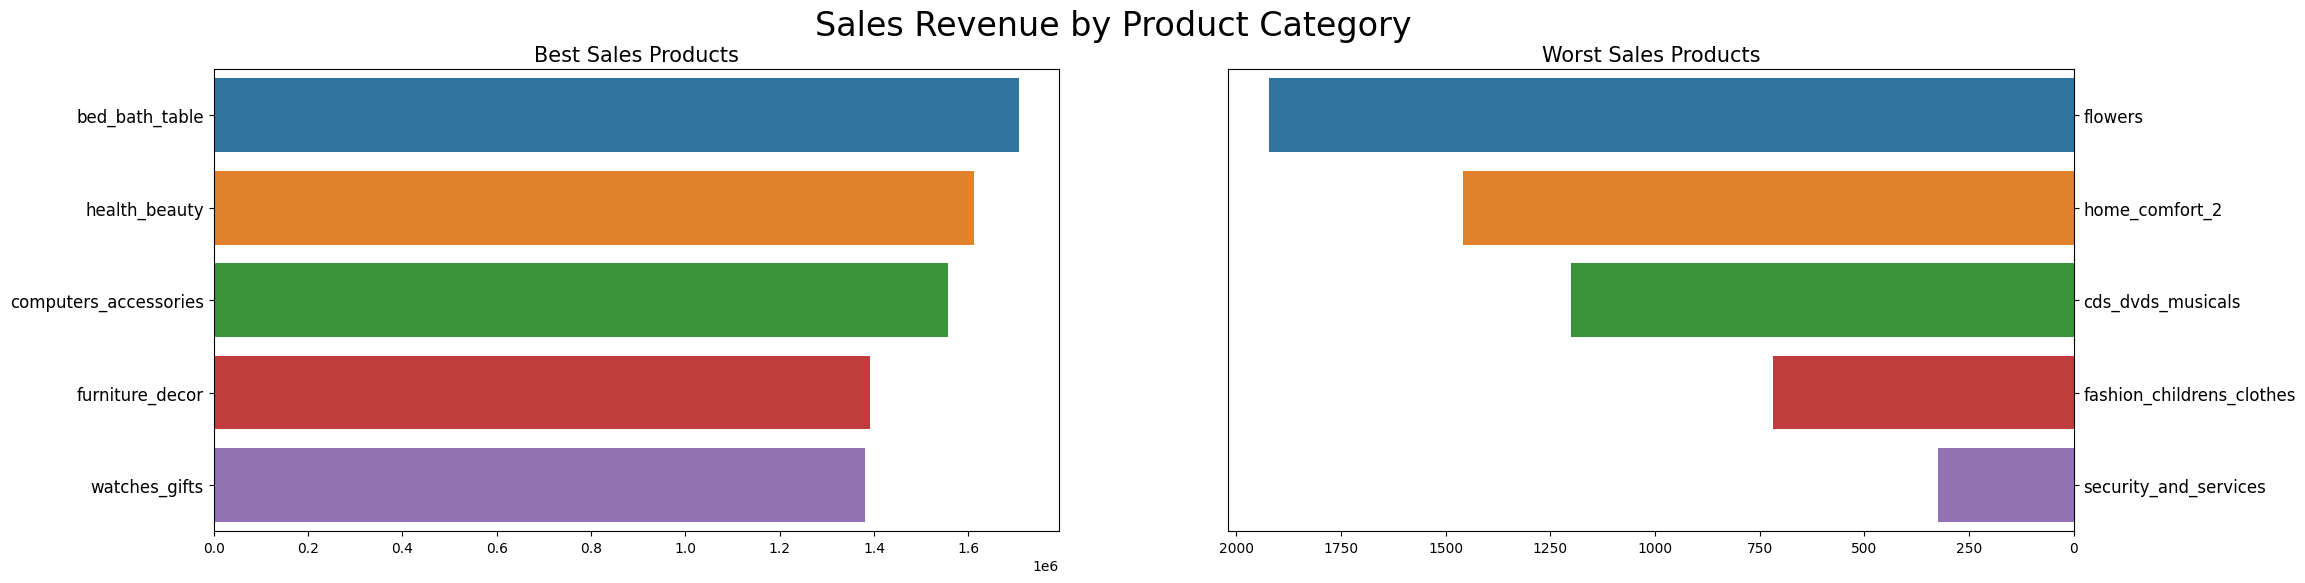

In [ ]:
fig, ax =  plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x="sales_revenue", y="product_category_name_english", data=sales_category_df.head(5), ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Sales Products", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="sales_revenue", y="product_category_name_english", data=sales_category_df.tail(5), ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Worst Sales Products",loc='center', fontsize =15)
ax[1].tick_params(axis='y',labelsize =12)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

plt.suptitle ('Sales Revenue by Product Category', fontsize = 24)
plt.show()

Bed bath table is the most valued category in Sales Revenues

### Pertanyaan 2: Bagaimana performa penjualan penjualan setiap bulan?

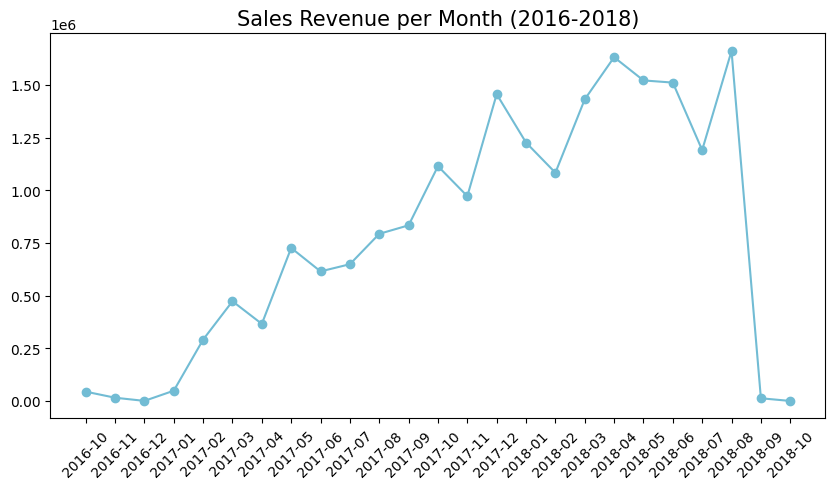

In [ ]:
monthly_revenues_df = all_df.resample(rule='M', on = 'order_delivered_customer_date').agg(payment_received=('payment_value','sum'))
monthly_revenues_df.index = monthly_revenues_df.index.strftime('%Y-%m')
monthly_revenues_df = monthly_revenues_df.reset_index()

#Code for Plotting
plt.figure(figsize=(10,5))
plt.plot(monthly_revenues_df["order_delivered_customer_date"], monthly_revenues_df['payment_received'], marker = 'o', color="#72BCD4")
plt.title("Sales Revenue per Month (2016-2018)", fontsize=15, loc= 'center')
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.show()

In terms of sales revenue, there is a significant improvement from 2016 to 2018. The highest position is achieved on July 2018

### Pertanyaan 3:  Di mana wilayah yang memiliki persebaran konsumen paling banyak?

In [ ]:
customers_mapping_df = mapping_df.drop_duplicates('order_id')
customers_mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95559 entries, 0 to 12016605
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       95559 non-null  object        
 1   customer_id                    95559 non-null  object        
 2   order_status                   95559 non-null  object        
 3   order_purchase_timestamp       95559 non-null  datetime64[ns]
 4   order_approved_at              95559 non-null  datetime64[ns]
 5   order_delivered_carrier_date   95559 non-null  datetime64[ns]
 6   order_delivered_customer_date  95559 non-null  datetime64[ns]
 7   order_estimated_delivery_date  95559 non-null  datetime64[ns]
 8   order_item_id                  95559 non-null  int64         
 9   product_id                     95559 non-null  object        
 10  seller_id                      95559 non-null  object        
 11  shipping_lim

In [ ]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='blue')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

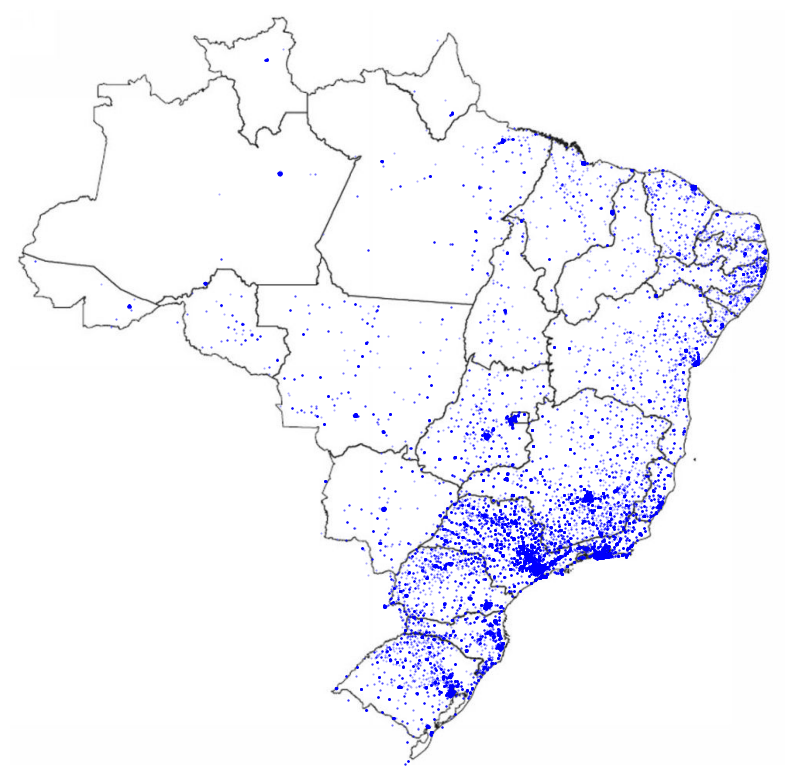

In [ ]:
plot_brazil_map(customers_mapping_df.drop_duplicates('customer_id'))

Customers are mostly concentrated around southern part of Brazil especially towards the Atlantic Ocean

### Pertanyaan 4: Bagaimana Performa Penjualan berdasarkan analisis RFM?

In [ ]:
rfm_df = all_df.groupby(by='customer_unique_id',as_index=False).agg(last_order_time = ('order_purchase_timestamp','max'),
                                                             frequency = ('order_id','nunique'),
                                                             monetary = ('payment_value','sum'))
#Menghitung transaksi terakhir
rfm_df["last_order_time"] = rfm_df["last_order_time"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["last_order_time"].apply(lambda x: (recent_date - x).days)
rfm_df.drop('last_order_time',axis=1,inplace=True)
rfm_df.head()


,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,114
2,0000f46a3911fa3c0805444483337064,1,86.22,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,321
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,288


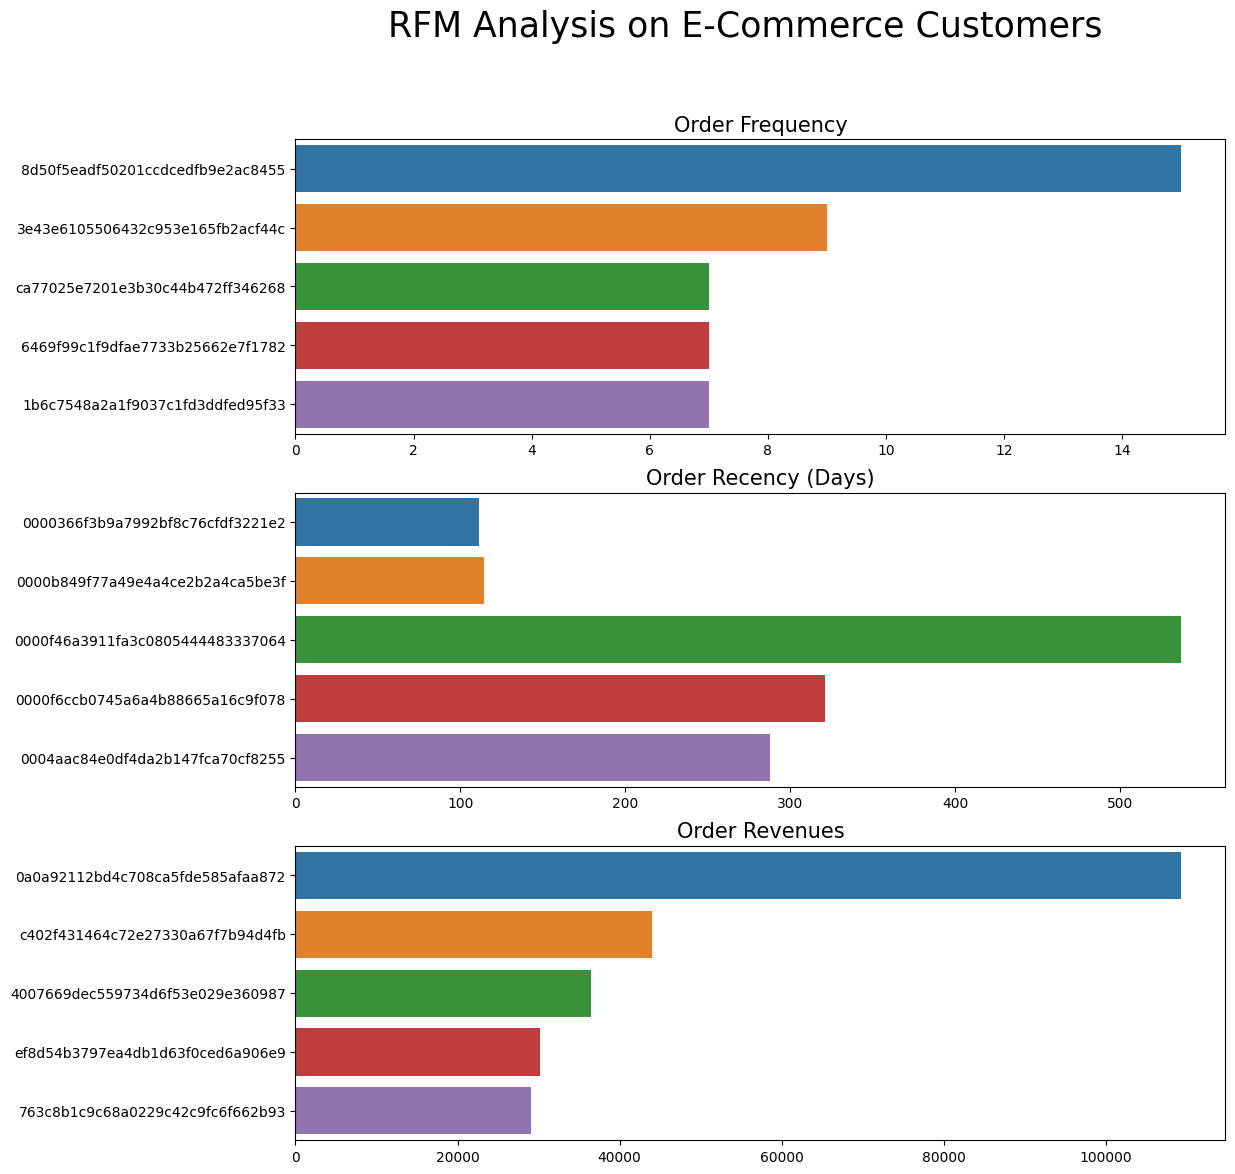

In [ ]:
fig,ax = plt.subplots(ncols=1 , nrows=3, figsize= (12,13))

sns.barplot(y='customer_unique_id',x='frequency',data= rfm_df.sort_values(by='frequency',ascending=False).head(5),ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Order Frequency', loc='center', fontsize = 15)

sns.barplot(y = 'customer_unique_id',x = 'recency',data =rfm_df.sort_values(by='customer_unique_id',ascending=True).head(5),ax = ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('Order Recency (Days)', loc='center', fontsize = 15)

sns.barplot(y ='customer_unique_id',x ='monetary',data=rfm_df.sort_values(by='monetary',ascending=False).head(5),ax = ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('Order Revenues', loc='center', fontsize =15)

plt.suptitle('RFM Analysis on E-Commerce Customers',fontsize =25)
plt.show()

## Conclusion

1. Bed bath table is the most valued category in Sales Revenues. On the other hand, security and service has the worst sales

2. In terms of sales revenue, there is a significant improvement from 2016 to 2018. The highest position is achieved on July 2018

3. Customers are mostly concentrated around southern part of Brazil especially towards the Atlantic Ocean

4. RFM analysis basically says that the maximum order frequency is more than 14, the order recency ranges from 0 to >500 days, and the highest revenue received is more than 100.000 in data's currency